<a href="https://colab.research.google.com/github/Saipraneetha21/CODTECH-IT/blob/main/sentiment_analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,review,sentiment
0,I didn't know what to make of this film. I gue...,positive
1,"Jim Belushi is having a mid life crisis, nothi...",negative
2,This movie basically uses spousal rape as one ...,negative
3,"Yep, lots of shouting, screaming, cheering, ar...",negative
4,Before I talk about the ending of this film I ...,positive
...,...,...
49995,I had long wanted to watch this romantic drama...,positive
49996,There is a reason to call this a teen flick. O...,negative
49997,This was one of the first color films I have s...,positive
49998,Chris Morris' Brass Eye TV series had always g...,positive


In [ ]:
class EDA():
    def get_length_dist(self,data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist()
        plt.title('Number of types of commets')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())
    def get_class_dist(self,df):
        df['sentiment'].replace({1:'positive',0:'negative'}).value_counts().plot(kind='bar',figsize=(7,4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()

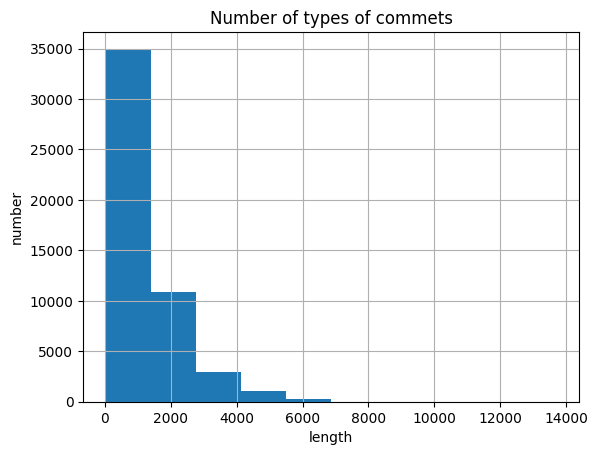

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
dtype: float64


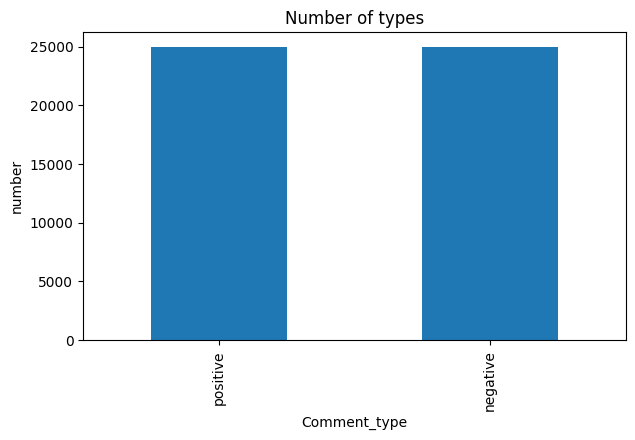

In [ ]:
eda = EDA()
eda.get_length_dist(df['review'])
eda.get_class_dist(df)

In [ ]:
def preprocess_text(text):
    # Remove HTML tags and strip whitespace
    text = re.sub(r'<[^>]*>', '', text)
    text = text.strip()
    # Remove noisy characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Lowercase text
    text = text.lower()
    # Tokenize text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
df['review'].head(20)

,review
0,didnt know make film guess really never seen f...
1,jim belushi mid life crisis nothing going righ...
2,movie basically uses spousal rape one main com...
3,yep lots shouting screaming cheering arguing c...
4,talk ending film talk plot dude named gerald b...
5,hunt justice canadian television drama made dv...
6,interesting feature fine storyline rather colo...
7,contrary hate christianity 700 club provides r...
8,crackling magnificent thriller child psychiatr...
9,critics like movie break heart etc friend mine...


In [ ]:
x = df['review']
y = df['sentiment']
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
Y = label_encode.fit_transform(df['sentiment'])
Y

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
y

,sentiment
0,positive
1,negative
2,negative
3,negative
4,positive
...,...
49995,positive
49996,negative
49997,positive
49998,positive


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

In [ ]:
from collections import Counter
word_counts = Counter(' '.join(xtrain).split())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

logistic_regression = LogisticRegression(max_iter=1000)

In [ ]:
def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

In [ ]:
batch_size = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  11.712490935000005


In [ ]:
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start)

Required time for embedding TFIDF with train data:-  4.164439791999939


In [ ]:
start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Logistic Regression classifiers:- ', timer() - start)

Required time for training Logistic Regression classifiers:-  6.489769455999976


In [ ]:
start = timer()
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Logistic Regression prediction:- ', timer() - start)

Required time for Logistic Regression prediction:-  0.6993538100000478


In [ ]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 0



In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix")
print(cm_lr)

Logistic Regression Accuracy: 0.68
Logistic Regression Precision: 0.69
Logistic Regression Recall: 0.66
Logistic Regression F1 score: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      4923
           1       0.69      0.66      0.67      5077

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Confusion Matrix
[[3419 1504]
 [1738 3339]]
